In [1]:
import tweedledum as td
from tweedledum.bool_function_compiler.decorators import circuit_input
from tweedledum import BitVec
from clique_counter import oracle_from_graph
import os
from qiskit_ibm_runtime import QiskitRuntimeService
from dotenv import load_dotenv, find_dotenv

import logging
logging.disable()

load_dotenv()
API_TOKEN = os.getenv("API_TOKEN")
API_INSTANCE = os.getenv("API_INSTANCE", None)
service = QiskitRuntimeService(channel="ibm_quantum", token=API_TOKEN, instance=API_INSTANCE)
backend = service.backend(name="ibm_rensselaer")

qiskit.passmanager.base_tasks - INFO - Pass: UnrollCustomDefinitions - 0.13494 (ms)
qiskit.passmanager.base_tasks - INFO - Pass: BasisTranslator - 1.12295 (ms)
spnego._gss - DEBUG - Python gssapi not available, cannot use any GSSAPIProxy protocols: No module named 'gssapi'
spnego._gss - DEBUG - Python gssapi IOV extension not available: No module named 'gssapi'
/tmp/nix-shell-153733-0/ipykernel_189612/2504452890.py:15: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(channel="ibm_quantum", token=API_TOKEN, instance=API_INSTANCE)


G has 1 cliques of size at least 2
Optimal iterations for N=3, M=1: 2


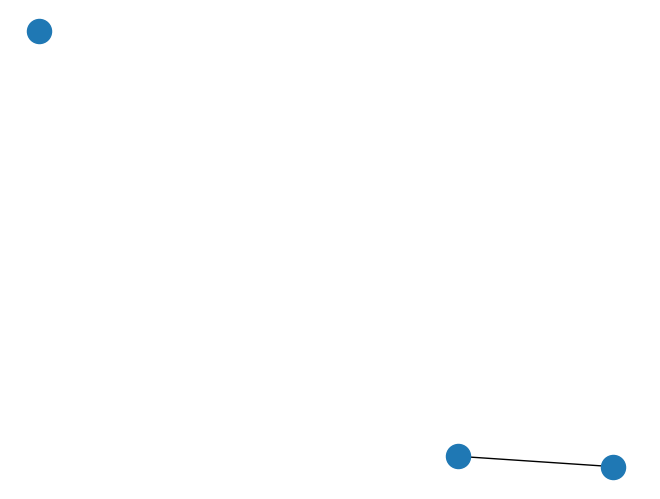

In [2]:
# Generate Random graph
import networkx as nx
import numpy as np
import math

def graph_to_binary_edge_list(g): 
    n = g.number_of_nodes()
    return [int(G.has_edge(i, j)) for i in range(0, n) for j in range(0, n)]
    
def count_cliques(graph, k):
    from networkx.algorithms import enumerate_all_cliques
    """Classically counts cliques of size <= k."""
    cliques = list(enumerate_all_cliques(graph))
    count = len([node_list for node_list in cliques if len(node_list) >= k])
    return count

def from_last_time():
    N=3
    k = 2
    G = nx.Graph()
    G.add_nodes_from([i for i in range(0, N)])
    G.add_edges_from([(0, 1)])
    return N, k, G

def no_solutions():
    k = 2
    edges = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]
    # Reshape the flat list into an adjacency matrix
    adj_matrix = np.array(edges).reshape((6, 6))

    # Create graph from adjacency matrix
    G = nx.from_numpy_array(adj_matrix)
    return k, G

def one_solution():
    k = 2
        #    0  1  2  3  4  5
    edges = [0, 0, 0, 0, 0, 0,    # vtx 0
             0, 0, 0, 0, 0, 0,    # vtx 1
             0, 0, 0, 0, 0, 0,    # vtx 2
             0, 0, 0, 0, 1, 1,    # vtx 3
             0, 0, 0, 1, 0, 1,    # vtx 4
             0, 0, 0, 1, 1, 0]    # vtx 5
    # Reshape the flat list into an adjacency matrix
    adj_matrix = np.array(edges).reshape((N,N))
    # Create graph from adjacency matrix
    G = nx.from_numpy_array(adj_matrix)
    return k, Gc



N, k, G= from_last_time()
#k, G, = no_solutions()
#k, G = one_solution(parameterized_clique_counter_batcher)

m = count_cliques(G, k)
print(f"G has {m} cliques of size at least {k}")
nx.draw(G)

if m < (1 << N): # Avoid error if m=2^n
    optimal_iterations = math.floor(
        math.pi / (4 * math.asin(math.sqrt(m / (1 << N))))
    )

print(f"Optimal iterations for N={N}, M={m}: {optimal_iterations}")

Transformer: Evaluating IF condition: Constant(value=False)
Transformer: Condition evaluated to: False
Transformer: IF condition False, no orelse, removing node.
Transformer: Evaluating IF condition: Constant(value=True)
Transformer: Condition evaluated to: True
Transformer: IF condition True, processing body.
Transformer: Evaluating IF condition: Constant(value=True)
Transformer: Condition evaluated to: True
Transformer: IF condition True, processing body.
SOURCE: 
def parameterized_clique_counter_batcher(vertices: BitVec(3, '000')) -> BitVec(1):
    """Counts cliques of size 2 in a graph specified by the edge list."""
    s = BitVec(1, 1)
    s = s & ~(vertices[0] & vertices[2])
    s = s & ~(vertices[1] & vertices[2])
    b_tmp_h_0 = vertices[0] | vertices[1]
    b_tmp_l_0 = vertices[0] & vertices[1]
    b_tmp_h_1 = b_tmp_h_0 | vertices[2]
    b_tmp_l_1 = b_tmp_h_0 & vertices[2]
    b_tmp_h_2 = b_tmp_l_0 | b_tmp_l_1
    b_tmp_l_2 = b_tmp_l_0 & b_tmp_l_1
    sorted_bit_0 = b_tmp_h_2


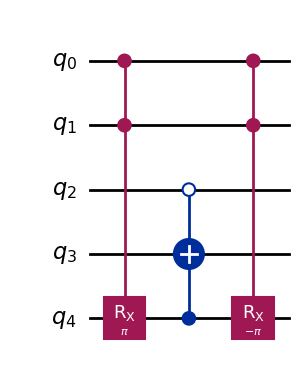

In [3]:
oracle = oracle_from_graph(graph=G, clique_size=k)
oracle.draw("mpl")

In [26]:
import qiskit
from qiskit.quantum_info import Statevector
import numpy as np
import math
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.circuit.library import grover_operator
from qiskit_ibm_runtime import SamplerV2 as Sampler

# Assume analyze_counts function is defined as before
# from __main__ import analyze_counts

def find_solution_grover(oracle, num_vertex_qubits, m=1, use_simulator=False):
    """
    Grover's algorithm using a pre-constructed PHASE-FLIP oracle
    and a MANUAL diffusion operator implementation (using mcx).

    Args:
        oracle: The Qiskit QuantumCircuit implementing the phase-flip oracle.
        num_vertex_qubits: The number of qubits in the search space (N).
        m: The estimated number of solutions (default: 1).
        use_simulator: Flag to use AerSimulator.

    Returns:
        A dictionary of measurement counts.
    """
    n = num_vertex_qubits
    if n < 1:
        print("Warning: Number of search qubits must be at least 1.")
        return {}
    total_qubits = oracle.num_qubits
    print(f"\nRunning Grover with MANUAL Diffusion (N={n}, Total Qubits={total_qubits})")

    # Ensure oracle has enough qubits for the search space
    if total_qubits < n:
         raise ValueError(f"Oracle qubit count ({total_qubits}) is less than search space ({n}).")

    # ---  Calculate Iterations ---
    if not (m >= 1 and m <= 2**n):
         print(f"Warning: Number of solutions m={m} is outside valid range [1, 2^N]. Assuming m=1.")
         m = 1

    optimal_iterations = 0
    if m < (1 << n): # Avoid error if m=2^n
        optimal_iterations = math.floor(
            math.pi / (4 * math.asin(math.sqrt(m / (1 << n))))
        )
    print(f"Optimal iterations for N={n}, M={m}: {optimal_iterations}")

    if optimal_iterations == 0 and m > 0:
        print("Warning: Optimal iterations calculated as 0. Grover search may not be effective.")
        # Still run once if you want to see oracle effect
        # optimal_iterations = 1

        
    search_circuit = qiskit.QuantumCircuit(total_qubits, n) # Classical bits for measuring N search qubits
    search_circuit.x(n)
    search_circuit.h(n)
    search_circuit.h(range(n))
    grover_op = grover_operator(oracle, reflection_qubits=range(n))
    #search_circuit.compose(grover_op.power(optimal_iterations), inplace=True)
    search_circuit.compose(grover_op.power(1), inplace=True)
    search_circuit.measure(range(n), range(n))

    # ---  Run Simulation ---
    
    simulator = AerSimulator()
    # Transpilation is likely needed because mcx might decompose further
    pass_manager = generate_preset_pass_manager(optimization_level=0, backend=backend)
    print("Transpiling final Grover circuit...")
    qc = pass_manager.run(search_circuit)
    print(qc.draw())
    print("Running simulation...")
    result = simulator.run(qc, shots=10**4).result()
    counts = result.get_counts()

    print("Submitting job")
    sampler = Sampler(backend)
    job = sampler.run([qc], shots=10**4)
    print(job.job_id())

    return job, counts

job, sim_counts = find_solution_grover(
    oracle=oracle,
    num_vertex_qubits=G.number_of_nodes(),
    m=m,
)


Running Grover with MANUAL Diffusion (N=3, Total Qubits=5)
Optimal iterations for N=3, M=1: 2
Transpiling final Grover circuit...
global phase: 5π/4
         ┌─────────┐    ┌────┐  ┌─────────┐┌─────────┐ ┌─────────┐ ┌────┐»
q_0 -> 0 ┤ Rz(π/2) ├────┤ √X ├──┤ Rz(π/2) ├┤ Rz(π/2) ├─┤ Rz(π/2) ├─┤ √X ├»
         ├─────────┤    ├────┤  ├─────────┤├─────────┴┐├─────────┤ ├────┤»
q_1 -> 1 ┤ Rz(π/2) ├────┤ √X ├──┤ Rz(π/2) ├┤ Rz(-π/2) ├┤ Rz(π/2) ├─┤ √X ├»
         ├─────────┤    ├────┤  ├─────────┤└──┬───┬───┘├─────────┴┐├────┤»
q_2 -> 2 ┤ Rz(π/2) ├────┤ √X ├──┤ Rz(π/2) ├───┤ X ├────┤ Rz(-π/2) ├┤ √X ├»
         └──┬───┬──┘ ┌──┴────┴─┐└──┬────┬─┘┌──┴───┴──┐ ├─────────┬┘├────┤»
q_3 -> 3 ───┤ X ├────┤ Rz(π/2) ├───┤ √X ├──┤ Rz(π/2) ├─┤ Rz(π/2) ├─┤ √X ├»
         ┌──┴───┴───┐├─────────┤   ├────┤  ├─────────┴┐└─────────┘ └────┘»
q_4 -> 4 ┤ Rz(-π/2) ├┤ Rz(π/2) ├───┤ √X ├──┤ Rz(-π/2) ├──────────────────»
         └──────────┘└─────────┘   └────┘  └──────────┘                  »
    c: 3/════════════════

{'001': 1080, '110': 1456, '101': 995, '100': 893, '011': 1483, '000': 1109, '010': 1886, '111': 1098}


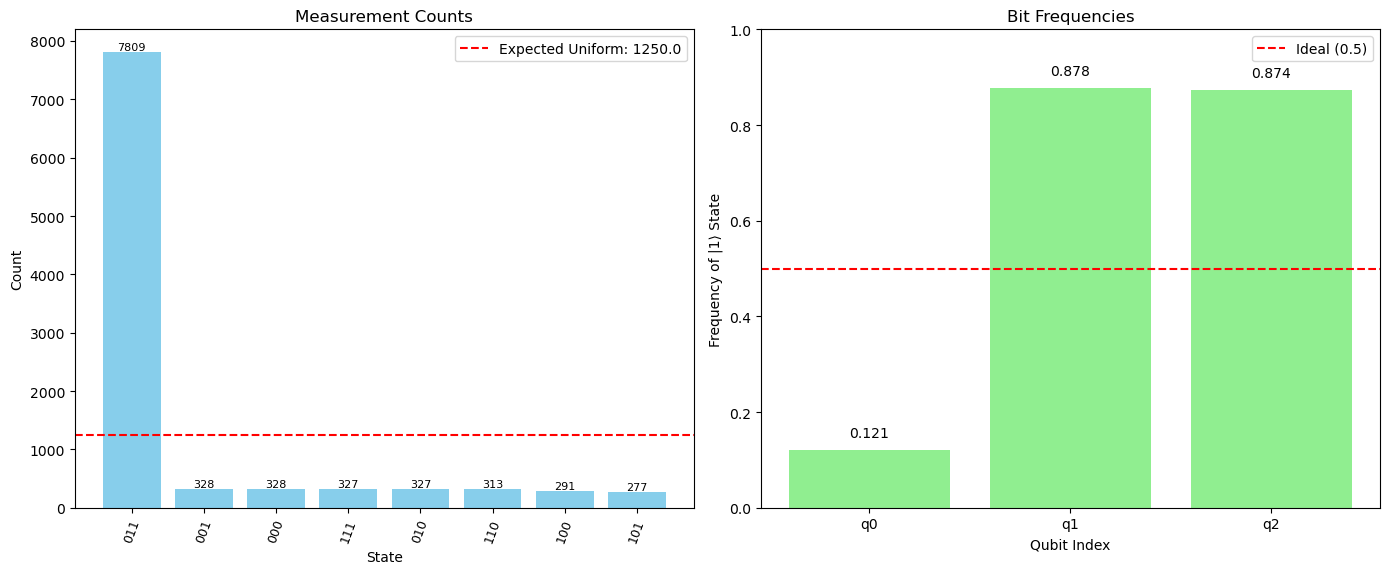

Total samples: 10000
Highest state: 011 (7809 counts, 78.09%)
Lowest state: 101 (277 counts, 2.77%)
✓ Strong signal detected in state 011 (78.1%)


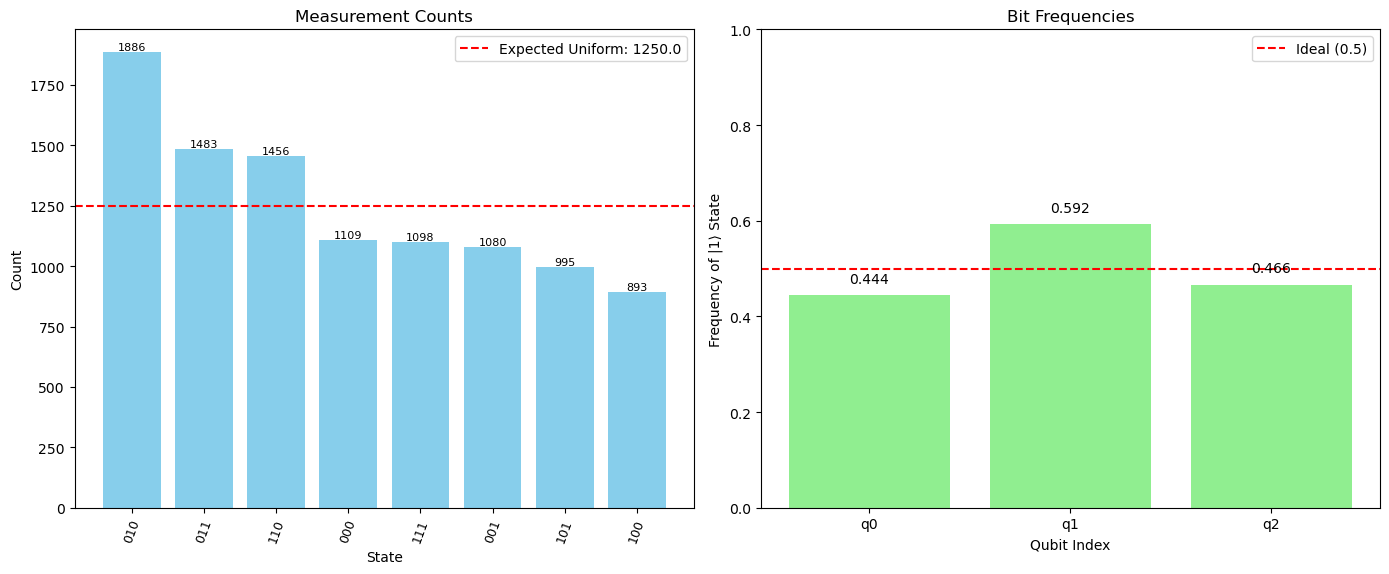

Total samples: 10000
Highest state: 010 (1886 counts, 18.86%)
Lowest state: 100 (893 counts, 8.93%)
⚠ No clear winner detected. Top state has only 18.9% probability


{'total_samples': 10000,
 'top_state': '010',
 'top_probability': 0.1886,
 'bit_frequencies': {'q0': np.float64(0.4442),
  'q1': np.float64(0.5923),
  'q2': np.float64(0.4656)}}

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def simple_visualize_results(results_dict, title="Quantum Measurement Results"):
    """
    A simple visualization for quantum measurement results.
    
    Parameters:
    -----------
    results_dict : dict
        Dictionary with quantum states as keys and counts as values
    title : str, optional
        Title for the visualization
    """
    # Basic calculations
    total_samples = sum(results_dict.values())
    n_qubits = len(list(results_dict.keys())[0])
    
    # Sort results by count (descending)
    sorted_results = dict(sorted(results_dict.items(), key=lambda x: x[1], reverse=True))
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # 1. Bar chart of states
    bars = ax1.bar(range(len(sorted_results)), sorted_results.values(), color='skyblue')
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)
    
    # Set the x-tick positions and labels
    ax1.set_xticks(range(len(sorted_results)))
    ax1.set_xticklabels(list(sorted_results.keys()), rotation=70, fontsize=9)
    
    # Add uniform expectation line
    expected_uniform = total_samples / len(results_dict)
    ax1.axhline(y=expected_uniform, color='red', linestyle='--', 
                label=f'Expected Uniform: {expected_uniform:.1f}')
    
    ax1.set_title('Measurement Counts')
    ax1.set_xlabel('State')
    ax1.set_ylabel('Count')
    ax1.legend()
    
    # 2. Bit frequencies
    bit_counts = np.zeros(n_qubits)
    
    for state, count in results_dict.items():
        for i, bit in enumerate(state):
            if bit == '1':
                bit_counts[i] += count
    
    bit_frequencies = bit_counts / total_samples
    
    bars = ax2.bar(range(n_qubits), bit_frequencies, color='lightgreen')
    ax2.axhline(0.5, color='red', linestyle='dashed', label='Ideal (0.5)')
    
    # Add frequency values on top of bars
    for bar, freq in zip(bars, bit_frequencies):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{freq:.3f}', ha='center', va='bottom')
    
    ax2.set_ylim(0, 1)
    ax2.set_title('Bit Frequencies')
    ax2.set_xlabel('Qubit Index')
    ax2.set_ylabel('Frequency of |1⟩ State')
    ax2.set_xticks(range(n_qubits))
    ax2.set_xticklabels([f'q{i}' for i in range(n_qubits)])
    ax2.legend()
    
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Print simple statistics
    print(f"Total samples: {total_samples}")
    print(f"Highest state: {list(sorted_results.keys())[0]} ({list(sorted_results.values())[0]} counts, {list(sorted_results.values())[0]/total_samples*100:.2f}%)")
    print(f"Lowest state: {list(sorted_results.keys())[-1]} ({list(sorted_results.values())[-1]} counts, {list(sorted_results.values())[-1]/total_samples*100:.2f}%)")
    
    # Check for clear winner (probability > 20%)
    top_prob = list(sorted_results.values())[0] / total_samples
    if top_prob > 0.2:
        print(f"✓ Strong signal detected in state {list(sorted_results.keys())[0]} ({top_prob*100:.1f}%)")
    else:
        print(f"⚠ No clear winner detected. Top state has only {top_prob*100:.1f}% probability")
    
    # Check for uniformity
    uniformity_threshold = 0.05  # 5% variation
    max_variation = max(abs(count/total_samples - 1/len(results_dict)) for count in results_dict.values())
    
    if max_variation < uniformity_threshold:
        print(f"⚠ Distribution appears close to uniform (max variation: {max_variation*100:.1f}%)")
    
    # Return a simple summary for programmatic use
    return {
        "total_samples": total_samples,
        "top_state": list(sorted_results.keys())[0],
        "top_probability": top_prob,
        "bit_frequencies": {f"q{i}": freq for i, freq in enumerate(bit_frequencies)}
    }

hw_counts = job.result()[0].data.c.get_counts()
print(hw_counts)

simple_visualize_results(sim_counts, "")
simple_visualize_results(hw_counts, "")

In [ ]:
import qiskit
from qiskit.quantum_info import Statevector
import numpy as np
import math

# --- Configuration ---
n_search_qubits = 4
try:
    # *** USE THE QISKIT PHASE ORACLE GENERATED BY phaseflip_circuit ***
    phase_oracle_qiskit = oracle
    total_qubits = phase_oracle_qiskit.num_qubits
    print(f"Verifying PHASE oracle with N={n_search_qubits} search qubits.")
    print(f"Oracle has {total_qubits} total qubits.")
    # Phase oracle might use fewer qubits if output isn't explicit
    if total_qubits < n_search_qubits:
         raise ValueError("Phase oracle has fewer qubits than search qubits.")
except NameError:
    print("Error: 'phase_oracle_qiskit' variable not defined.")
    exit()
except Exception as e:
    print(f"Error accessing oracle: {e}")
    exit()

search_qubit_indices = list(range(n_search_qubits))
# Ancillae are any qubits beyond the search space
ancilla_indices = list(range(n_search_qubits, total_qubits))

# Expected solution state (Qiskit order q3..q0)
expected_solution_str_qiskit_order = '0111'
# A non-solution state
non_solution_str_qiskit_order = '0000'

# --- Test Function ---
def verify_phase_oracle_state(oracle, input_label_qiskit_order):
    n_in = len(input_label_qiskit_order)
    total_q = oracle.num_qubits
    n_anc = total_q - n_in

    print(f"\n--- Verifying input: '{input_label_qiskit_order}' ---")

    # Initial state: |input> |0...0>_anc
    full_initial_label = ('0' * n_anc) + input_label_qiskit_order
    print(f"Initial state label (q_{total_q-1}...q_0): {full_initial_label}")

    try:
        initial_sv = Statevector.from_label(full_initial_label)
    except Exception as e:
        print(f"Error creating initial Statevector: {e}")
        return False, False # Indicate failure

    print("Applying phase oracle...")
    try:
        final_sv = initial_sv.evolve(oracle)
    except Exception as e:
        print(f"Error evolving statevector with phase oracle: {e}")
        return False, False # Indicate failure

    # Analyze final state
    print("Analyzing final state...")
    amps_initial = initial_sv.to_dict(decimals=9)
    amps_final = final_sv.to_dict(decimals=9)

    initial_amp = amps_initial.get(full_initial_label, 0)
    final_amp = amps_final.get(full_initial_label, 0)

    print(f"Amplitude for state {full_initial_label}: Initial={initial_amp:.4f} --> Final={final_amp:.4f}")

    # Check phase change (expect -1 for solution, +1 for non-solution)
    phase_correct = False
    if abs(initial_amp) > 1e-9 and abs(final_amp) > 1e-9:
        relative_phase = final_amp / initial_amp
        if input_label_qiskit_order == expected_solution_str_qiskit_order:
            # Expect phase ~ -1
            if np.isclose(relative_phase, -1.0):
                phase_correct = True
                print("Phase check: Correct (-1) phase found for solution ✅")
            else:
                print(f"Phase check: Incorrect phase {relative_phase:.4f} found for solution (expected -1) ❌")
        else:
            # Expect phase ~ +1
            if np.isclose(relative_phase, 1.0):
                phase_correct = True
                print("Phase check: Correct (+1) phase found for non-solution ✅")
            else:
                print(f"Phase check: Incorrect phase {relative_phase:.4f} found for non-solution (expected +1) ❌")
    else:
        print("Phase check: Cannot determine phase due to zero amplitude.")

    # Check ancillae cleanliness
    ancilla_clean = True
    for state_label, amp in amps_final.items():
        if abs(amp) > 1e-9:
            # Check if it's the expected main state
            if state_label == full_initial_label:
                continue
            # If it's another state, check if ancillae were disturbed
            is_main_input = state_label.endswith(input_label_qiskit_order)
            ancilla_part_dirty = False
            for idx in ancilla_indices:
                string_index = (total_q - 1) - idx
                if state_label[string_index] == '1':
                     ancilla_part_dirty = True
                     break
            # Allow non-zero amplitude only if it's the original input state with clean ancillae
            if not (state_label == full_initial_label and not ancilla_part_dirty) :
                 # Check if maybe only the input part changed (shouldn't happen)
                 input_part_final = state_label[len(ancilla_indices):]
                 if input_part_final != input_label_qiskit_order:
                      print(f"Ancilla/Input state incorrect! State: {state_label}, Amp: {amp:.4f}. Input changed! ❌")
                 elif ancilla_part_dirty:
                      print(f"Ancilla/Input state incorrect! State: {state_label}, Amp: {amp:.4f}. Ancilla dirty! ❌")
                 # If input is same and ancilla clean, it must be the main state already handled.
                 # This logic might need refinement if complex states appear.

                 # Simplified check: only the original state should have non-zero amplitude
                 if state_label != full_initial_label:
                     print(f"State other than initial found! State: {state_label}, Amp: {amp:.4f}. Possible ancilla/logic error. ❌")
                     ancilla_clean = False


    if ancilla_clean:
         # Double check based on state labels found
         ancilla_truly_clean = True
         for state_label, amp in amps_final.items():
              if abs(amp) > 1e-9:
                   for idx in ancilla_indices:
                       string_index = (total_q - 1) - idx
                       if state_label[string_index] == '1':
                            ancilla_truly_clean = False
                            break
                   if not ancilla_truly_clean: break
         if ancilla_truly_clean:
             print("Ancilla Cleanliness: All ancillae remained |0> ✅")
         else:
              print("Ancilla Cleanliness: Ancillae became non-zero ❌")
              ancilla_clean = False # Ensure it's marked false

    return phase_correct, ancilla_clean

# --- Run Verification ---
sol_phase_ok, sol_anc_ok = verify_phase_oracle_state(phase_oracle_qiskit, expected_solution_str_qiskit_order)
nonsol_phase_ok, nonsol_anc_ok = verify_phase_oracle_state(phase_oracle_qiskit, non_solution_str_qiskit_order)

print("\n--- Phase Oracle Verification Summary ---")
if sol_phase_ok and sol_anc_ok and nonsol_phase_ok and nonsol_anc_ok:
    print("✅ Phase oracle appears correct and keeps ancillae clean.")
else:
    print("❌ Phase oracle verification FAILED.")
    if not sol_phase_ok: print("  - Incorrect phase for solution state.")
    if not nonsol_phase_ok: print("  - Incorrect phase for non-solution state.")
    if not sol_anc_ok or not nonsol_anc_ok: print("  - Ancilla qubits did not remain |0>.")

In [ ]:
import qiskit
from qiskit.quantum_info import Statevector
import numpy as np
import math

# --- Configuration ---
# Assume opt_oracle is your Qiskit circuit for the N=4 case
# You confirmed the N=4 oracle works correctly via Statevector.evolve previously.
n_search_qubits = N # N=4 problem
try:
    opt_oracle = opt_oracle # Make sure this variable holds the N=4 Qiskit oracle circuit
    total_qubits = opt_oracle.num_qubits
    print(f"Using N={n_search_qubits} search qubits.")
    print(f"Oracle has {total_qubits} total qubits.")
    if total_qubits < n_search_qubits + 1:
        raise ValueError("Oracle has fewer qubits than needed for inputs + output.")
except NameError:
    print("Error: 'opt_oracle' variable not defined. Please ensure it holds the Qiskit circuit.")
    exit()
except Exception as e:
    print(f"Error accessing oracle: {e}")
    exit()

output_qubit_index = n_search_qubits
search_qubit_indices = list(range(n_search_qubits))
ancilla_indices = list(range(output_qubit_index + 1, total_qubits))

# Define the expected solution state string (Qiskit order: q_{n-1}...q_0)
# For N=4, solution is vertices 0 and 2 -> |0101>
expected_solution_str_qiskit_order = '0101'

# --- 1. Prepare Initial State ---
print("\n--- Step 1: Preparing Initial State ---")
init_circuit = qiskit.QuantumCircuit(total_qubits, name="Init")
# Superposition on search qubits
init_circuit.h(search_qubit_indices)
# Prepare output qubit in |-⟩ state for phase kickback
init_circuit.x(output_qubit_index)
init_circuit.h(output_qubit_index)
# Ancillae remain |0⟩ (default)

# Create statevector
sv_initial = Statevector(init_circuit)
print("Initial state prepared.")
# Optional: Print state for very small N
# if total_qubits <= 6: print(sv_initial)

# --- 2. Apply Oracle ---
print("\n--- Step 2: Applying Oracle ---")
try:
    sv_after_oracle = sv_initial.evolve(opt_oracle)
    print("Oracle applied to statevector.")
except Exception as e:
    print(f"Error evolving statevector with oracle: {e}")
    exit()

# --- 3. Analyze Oracle Effect ---
print("\n--- Step 3: Analyzing Oracle Effect ---")
probs_after_oracle = sv_after_oracle.probabilities_dict(decimals=9)
non_zero_states_oracle = {k: v for k, v in probs_after_oracle.items() if v > 1e-12}

phase_flipped = False
ancilla_clean_oracle = True
print(f"States with non-zero probability ({len(non_zero_states_oracle)} states):")

# We need amplitudes to check phase
amps_initial = sv_initial.to_dict(decimals=9)
amps_after_oracle = sv_after_oracle.to_dict(decimals=9)

# Find amplitude of solution and a non-solution BEFORE oracle
sol_label_full = ('0' * len(ancilla_indices)) + '1' + expected_solution_str_qiskit_order # |-⟩ on output
nonsol_label_full = ('0' * len(ancilla_indices)) + '1' + ('0' * n_search_qubits)       # |-⟩ on output

amp_sol_initial = amps_initial.get(sol_label_full, 0)
amp_nonsol_initial = amps_initial.get(nonsol_label_full, 0)

print(f"Initial Amp Solution   ({sol_label_full}): {amp_sol_initial}")
print(f"Initial Amp Non-Sol 0 ({nonsol_label_full}): {amp_nonsol_initial}")

# Check solution state phase AFTER oracle
amp_sol_after = amps_after_oracle.get(sol_label_full, 0)
amp_nonsol_after = amps_after_oracle.get(nonsol_label_full, 0)

print(f"After Oracle Amp Solution   ({sol_label_full}): {amp_sol_after}")
print(f"After Oracle Amp Non-Sol 0 ({nonsol_label_full}): {amp_nonsol_after}")

# Check relative phase flip (handle potential zero amplitudes)
if abs(amp_sol_initial) > 1e-9 and abs(amp_nonsol_initial) > 1e-9 and \
   abs(amp_sol_after) > 1e-9 and abs(amp_nonsol_after) > 1e-9:
    relative_phase_initial = amp_sol_initial / amp_nonsol_initial
    relative_phase_after = amp_sol_after / amp_nonsol_after
    if np.isclose(relative_phase_after, -relative_phase_initial):
        phase_flipped = True
        print("Phase flip detected for solution state: ✅")
    else:
        print(f"Phase flip NOT detected for solution state: ❌ (Initial Rel Phase: {relative_phase_initial:.3f}, After Oracle Rel Phase: {relative_phase_after:.3f})")
else:    # *** REMOVED: Phase kickback preparation ***

    print("Could not reliably check phase flip due to near-zero amplitudes.")
    # Check if solution amplitude itself flipped sign relative to non-solution
    if amp_nonsol_initial != 0 and amp_nonsol_after != 0 and np.sign(amp_sol_initial.real) != np.sign(amp_sol_after.real) and np.sign(amp_nonsol_initial.real) == np.sign(amp_nonsol_after.real):
         phase_flipped = True
         print("(Sign flip of solution amplitude detected)")


# Check ancillae cleanliness after oracle
for state_label, amp in amps_after_oracle.items():
     if abs(amp) > 1e-9:
         for idx in ancilla_indices:
             string_index = (total_qubits - 1) - idx
             if state_label[string_index] == '1':
                 print(f"Ancilla dirty after oracle! State: {state_label}, Amp: {amp}: ❌")
                 ancilla_clean_oracle = False
                 # break # Uncomment to stop after first dirty ancilla

if ancilla_clean_oracle:
    print("Ancillae clean after oracle: ✅")

# --- 4. Prepare Diffusion Operator ---
print("\n--- Step 4: Preparing Diffusion Operator Circuit ---")
# Diffusion operator acts ONLY on the n search qubits
diffuser_circuit = qiskit.QuantumCircuit(n_search_qubits, name="Diffuser")
diffuser_circuit.h(search_qubit_indices)
diffuser_circuit.x(search_qubit_indices)

# MCZ part
controls = list(range(n_search_qubits - 1)) # 0..n-2
target = n_search_qubits - 1              # n-1

if n_search_qubits == 1:
    diffuser_circuit.z(0)
elif n_search_qubits > 1:
    diffuser_circuit.h(target)
    if controls: # Check if controls list is not empty (n > 1)
        diffuser_circuit.mcp(np.pi, controls, target)
    # Note: Qiskit's mcp might handle n=2 case automatically where controls is empty
    # If n=2, mcp(pi, [0], 1) is just CZ or CP(pi, 0, 1)
    # Let's assume mcp handles it or add specific check if needed
    diffuser_circuit.h(target)

diffuser_circuit.x(search_qubit_indices)
diffuser_circuit.h(search_qubit_indices)
print("Diffusion circuit created:")
# print(diffuser_circuit.draw(output='text')) # Optional: Draw for small N


# --- 5. Apply Diffusion ---
print("\n--- Step 5: Applying Diffusion Operator ---")
# IMPORTANT: Evolve using the state AFTER the oracle, and specify qargs
try:
    # Apply diffuser only to the search qubits
    sv_after_diffusion = sv_after_oracle.evolve(diffuser_circuit, qargs=search_qubit_indices)
    print("Diffusion operator applied to statevector.")
except Exception as e:
    print(f"Error evolving statevector with diffusion operator: {e}")
    exit()

# --- 6. Analyze Diffusion Effect ---
print("\n--- Step 6: Analyzing Diffusion Effect ---")
probs_after_diffusion = sv_after_diffusion.probabilities_dict(decimals=9)
non_zero_states_diffusion = {k: v for k, v in probs_after_diffusion.items() if v > 1e-12}

print(f"States with non-zero probability ({len(non_zero_states_diffusion)} states):")

# Get probabilities of the specific states
prob_sol_initial = abs(amp_sol_initial)**2
prob_nonsol_initial = abs(amp_nonsol_initial)**2

prob_sol_after_diffusion = probs_after_diffusion.get(sol_label_full, 0)
prob_nonsol_after_diffusion = probs_after_diffusion.get(nonsol_label_full, 0)

print(f"\nProb Solution   ({sol_label_full}): Initial={prob_sol_initial:.4f} --> After Diffusion={prob_sol_after_diffusion:.4f}")
print(f"Prob Non-Sol 0 ({nonsol_label_full}): Initial={prob_nonsol_initial:.4f} --> After Diffusion={prob_nonsol_after_diffusion:.4f}")

amplification_occurred = False
if prob_sol_after_diffusion > prob_sol_initial * 1.1: # Check for >10% increase
     amplification_occurred = True
     print("Amplitude amplification detected: ✅")
else:
     print("Amplitude amplification NOT detected: ❌")

# Final check on ancillae after diffusion (should ideally remain clean)
ancilla_clean_diffusion = True
for state_label, prob in probs_after_diffusion.items():
     if prob > 1e-9:
         for idx in ancilla_indices:
             string_index = (total_qubits - 1) - idx
             if state_label[string_index] == '1':
                 print(f"Ancilla dirty after diffusion! State: {state_label}, Prob: {prob}: ❌")
                 ancilla_clean_diffusion = False
                 # break

if ancilla_clean_diffusion:
    print("Ancillae clean after diffusion: ✅")

print("\n--- Overall Analysis ---")
if phase_flipped and ancilla_clean_oracle and amplification_occurred and ancilla_clean_diffusion:
     print("✅ Step-by-step simulation successful for one iteration.")
else:
     print("❌ Step-by-step simulation failed. Issues detected:")
     if not phase_flipped: print("  - Oracle did not apply expected phase flip.")
     if not ancilla_clean_oracle: print("  - Oracle left ancillae dirty.")
     if not amplification_occurred: print("  - Diffusion operator did not amplify solution probability.")
     if not ancilla_clean_diffusion: print("  - Diffusion operator left ancillae dirty (unexpected).")

In [ ]:
import qiskit
from qiskit.quantum_info import Statevector
import numpy as np
import math

# --- Configuration ---
n_search_qubits = 4 # N=4 problem
try:
    opt_oracle = opt_oracle # Make sure this variable holds the N=4 Qiskit oracle circuit
    total_qubits = opt_oracle.num_qubits
    print(f"Using N={n_search_qubits} search qubits.")
    print(f"Oracle has {total_qubits} total qubits.")
    if total_qubits < n_search_qubits + 1:
        raise ValueError("Oracle has fewer qubits than needed for inputs + output.")
except NameError:
    print("Error: 'opt_oracle' variable not defined. Please ensure it holds the Qiskit circuit.")
    exit()
except Exception as e:
    print(f"Error accessing oracle: {e}")
    exit()

output_qubit_index = n_search_qubits
search_qubit_indices = list(range(n_search_qubits))
ancilla_indices = list(range(output_qubit_index + 1, total_qubits))
expected_solution_str_qiskit_order = '0101' # Qiskit order q3..q0

# --- Build Circuit for ONE Iteration ---
print("\n--- Building Circuit for One Iteration ---")
one_iter_circuit = qiskit.QuantumCircuit(total_qubits, n_search_qubits) # Classical bits only for final measure

# 1. Initialization
one_iter_circuit.h(search_qubit_indices)
one_iter_circuit.x(output_qubit_index)
one_iter_circuit.h(output_qubit_index)
one_iter_circuit.barrier(label="Init") # Add barrier for clarity

(0, 2), (1, 2), (1, 3# 2. Oracle
one_iter_circuit.compose(opt_oracle, inplace=True)
one_iter_circuit.barrier(label="Oracle")

# 3. Diffusion Operator
one_iter_circuit.h(search_qubit_indices)
one_iter_circuit.x(search_qubit_indices)
# MCZ part
controls = list(range(n_search_qubits - 1))
target = n_search_qubits - 1
if n_search_qubits == 1:
    one_iter_circuit.z(0)
elif n_search_qubits > 1:
    one_iter_circuit.h(target)
    if controls:
        one_iter_circuit.mcp(np.pi, controls, target)
    one_iter_circuit.h(target)
one_iter_circuit.x(search_qubit_indices)
one_iter_circuit.h(search_qubit_indices)
one_iter_circuit.barrier(label="Diffusion")

print("Circuit for one iteration built.")
# print(one_iter_circuit.draw(output='text')) # Optional: Draw it

# --- Simulate the Statevector AFTER One Iteration ---
print("\n--- Simulating Statevector After One Iteration ---")
try:
    sv_after_one_iteration = Statevector(one_iter_circuit)
    print("Statevector calculated.")
except Exception as e:
    print(f"Error creating statevector from one_iter_circuit: {e}")
    exit()

# --- Analyze the Final State ---
print("\n--- Analyzing State After One Iteration ---")
probs_final = sv_after_one_iteration.probabilities_dict(decimals=9)
amps_final = sv_after_one_iteration.to_dict(decimals=9)

# Construct the expected final label for the solution state
# After oracle, output is |1>, after diffusion it remains unchanged ideally
# So, label is |0...0>_anc |1>_out |solution>_in
sol_label_full_expected = ('0' * len(ancilla_indices)) + '1' + expected_solution_str_qiskit_order
nonsol_label_full_expected = ('0' * len(ancilla_indices)) + '1' + ('0' * n_search_qubits) # Check |0000> state

prob_sol_final = probs_final.get(sol_label_full_expected, 0)
prob_nonsol_final = probs_final.get(nonsol_label_full_expected, 0)

# Calculate initial probabilities (uniform superposition)
initial_prob_per_state = 1 / (2**n_search_qubits)

print(f"Prob Solution   ({sol_label_full_expected}): Initial={initial_prob_per_state:.4f} --> After 1 Iteration={prob_sol_final:.4f}")
print(f"Prob Non-Sol 0 ({nonsol_label_full_expected}): Initial={initial_prob_per_state:.4f} --> After 1 Iteration={prob_nonsol_final:.4f}")

amplification_occurred = False
# Check if solution probability significantly increased AND non-solution decreased
if prob_sol_final > initial_prob_per_state * 1.5 and prob_nonsol_final < initial_prob_per_state * 0.9:
     amplification_occurred = True
     print("Amplitude amplification detected: ✅")
else:
     print("Amplitude amplification NOT detected: ❌")

# Check ancillae cleanliness after full iteration
ancilla_clean_final = True
for state_label, prob in probs_final.items():
     if prob > 1e-9:
         # Check output qubit state - should ideally be |1> for these states
         output_string_index = (total_qubits - 1) - output_qubit_index
         if state_label[output_string_index] != '1':
              print(f"Warning: Output qubit q{output_qubit_index} not |1> in state {state_label} (Prob: {prob:.4f})")

         # Check ancilla qubits
         for idx in ancilla_indices:
             string_index = (total_qubits - 1) - idx
             if state_label[string_index] == '1':
                 print(f"Ancilla dirty after full iteration! State: {state_label}, Prob: {prob}: ❌")
                 ancilla_clean_final = False
                 # break

if ancilla_clean_final:
    print("Ancillae clean after full iteration: ✅")
else:
     print("Ancillae dirty after full iteration: ❌")

In [ ]:
import qiskit
from qiskit.quantum_info import Statevector
import numpy as np
import math
from qiskit import transpile
from qiskit_aer import AerSimulator # Needed for backend info

# --- Configuration ---
n_search_qubits = 4
try:
    opt_oracle = opt_oracle # N=4 oracle
    total_qubits = opt_oracle.num_qubits
    print(f"Using N={n_search_qubits} search qubits.")
    print(f"Oracle has {total_qubits} total qubits.")
except NameError: # ... (error handling)
    print("Error: 'opt_oracle' variable not defined.")
    exit()
except Exception as e: # ... (error handling)
    print(f"Error accessing oracle: {e}")
    exit()

output_qubit_index = n_search_qubits
search_qubit_indices = list(range(n_search_qubits))
ancilla_indices = list(range(output_qubit_index + 1, total_qubits))
expected_solution_str_qiskit_order = '0101'

# --- Build Circuit for ONE Iteration ---
print("\n--- Building Circuit for One Iteration ---")
one_iter_circuit = qiskit.QuantumCircuit(total_qubits, n_search_qubits)
one_iter_circuit.h(search_qubit_indices)
one_iter_circuit.x(output_qubit_index)
one_iter_circuit.h(output_qubit_index)
one_iter_circuit.barrier(label="Init")
one_iter_circuit.compose(opt_oracle, inplace=True)
one_iter_circuit.barrier(label="Oracle")
# Diffusion Operator
one_iter_circuit.h(search_qubit_indices)
one_iter_circuit.x(search_qubit_indices)
controls = list(range(n_search_qubits - 1))
target = n_search_qubits - 1
if n_search_qubits > 1:
    one_iter_circuit.h(target)
    if controls: one_iter_circuit.mcp(np.pi, controls, target)
    one_iter_circuit.h(target)
elif n_search_qubits == 1: one_iter_circuit.z(0)
one_iter_circuit.x(search_qubit_indices)
one_iter_circuit.h(search_qubit_indices)
one_iter_circuit.barrier(label="Diffusion")
print("Circuit built.")

# --- Explicit Transpilation ---
print("\n--- Transpiling the One-Iteration Circuit ---")
simulator = AerSimulator() # Need backend info for basis gates
basis_gates = simulator.configuration().basis_gates
# Try minimal optimization first
transpiled_one_iter = transpile(one_iter_circuit, backend=simulator, basis_gates=basis_gates, optimization_level=0)
print("Circuit transpiled (level 0).")
print(transpiled_one_iter.draw(output='text')) # Optional

# --- Simulate the Statevector from TRANSPILATION ---
print("\n--- Simulating Statevector from Transpiled Circuit ---")
try:
    # IMPORTANT: Use the transpiled circuit here
    sv_after_one_iteration = Statevector(transpiled_one_iter)
    print("Statevector calculated from transpiled circuit.")
except Exception as e:
    print(f"Error creating statevector from transpiled circuit: {e}")
    exit()

# --- Analyze the Final State (same analysis code as before) ---
print("\n--- Analyzing State After One Iteration (from Transpiled) ---")
probs_final = sv_after_one_iteration.probabilities_dict(decimals=9)
amps_final = sv_after_one_iteration.to_dict(decimals=9)
sol_label_full_expected = ('0' * len(ancilla_indices)) + '1' + expected_solution_str_qiskit_order
nonsol_label_full_expected = ('0' * len(ancilla_indices)) + '1' + ('0' * n_search_qubits)
prob_sol_final = probs_final.get(sol_label_full_expected, 0)
prob_nonsol_final = probs_final.get(nonsol_label_full_expected, 0)
initial_prob_per_state = 1 / (2**n_search_qubits)
print(f"Prob Solution   ({sol_label_full_expected}): Initial={initial_prob_per_state:.4f} --> After 1 Iteration={prob_sol_final:.4f}")
print(f"Prob Non-Sol 0 ({nonsol_label_full_expected}): Initial={initial_prob_per_state:.4f} --> After 1 Iteration={prob_nonsol_final:.4f}")
amplification_occurred = False
if prob_sol_final > initial_prob_per_state * 1.5 and prob_nonsol_final < initial_prob_per_state * 0.9:
     amplification_occurred = True
     print("Amplitude amplification detected: ✅")
else:
     print("Amplitude amplification NOT detected: ❌")
ancilla_clean_final = True
for state_label, prob in probs_final.items():
     if prob > 1e-9:
         output_string_index = (total_qubits - 1) - output_qubit_index
         if state_label[output_string_index] != '1':
              print(f"Warning: Output qubit q{output_qubit_index} not |1> in state {state_label} (Prob: {prob:.4f})")
         for idx in ancilla_indices:
             string_index = (total_qubits - 1) - idx
             if state_label[string_index] == '1':
                 print(f"Ancilla dirty after full iteration! State: {state_label}, Prob: {prob}: ❌")
                 ancilla_clean_final = False
if ancilla_clean_final: print("Ancillae clean after full iteration: ✅")
else: print("Ancillae dirty after full iteration: ❌")